# Regresión lineal simple
---

**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
def entorno_de_trabajo():
    if 'google.colab' in str(get_ipython()): return "colab"  # Colab?
    else: return "local"  # Local => Linux, Windows, WSL

if entorno_de_trabajo() == 'colab': # maquina virtual colab
    from google.colab import drive
    drive.mount('/content/drive/')  # monta G-drive en entorno COLAB

    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'  # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else: # entorno local # Rutas relativas al script para entornos locales Windows, WSL y Linux
    FUENTES_DIR = '../../FUENTES/'  # Ajusta según tu estructura
    DATOS_DIR = '../../DATOS/'

import sys
sys.path.append(FUENTES_DIR) # agrega ruta de busqueda donde tenemos archivos .py

Mounted at /content/drive/


#    Variantes del Descenso del Gradiente
**Descenso del Gradiente por Lotes (Batch Gradient Descent):**

* Calcula el gradiente utilizando todo el conjunto de datos en cada época.
* Ajusta los pesos una vez por época en función del gradiente global promedio.
* Adecuado para conjuntos de datos pequeños o medianos, pero costoso en conjuntos de datos grandes.

**Descenso de Gradiente Estocástico (Stocastic Gradient Descent):**

* Calcula el gradiente utilizando un solo ejemplo a la vez en cada iteración.
* Ajusta los pesos después de cada ejemplo.
* Converge más rápido, especialmente en conjuntos de datos grandes, pero con mayor variabilidad en la dirección del gradiente debido a la estocasticidad.

**Descenso del Gradiente por Mini-lotes (Mini-Batch Gradient Descent):**

* Calcula el gradiente utilizando un mini-lote (un pequeño subconjunto de ejemplos) en cada iteración.
* Ajusta los pesos después de cada mini-lote.
* Equilibra la eficiencia y la estabilidad del gradiente, utilizado comúnmente en prácticas de entrenamiento.


---


#   Error Cuadrático Medio  (Mean Square Error)



$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$


Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que intenta predecir el modelo) del ejemplo $i$.
- $\hat{y}_i$ es el valor predicho por el modelo para el ejemplo $i$.




### Preparación de los Datos


Correlación entre Entrenamiento y Tiempo: -0.959746386006859



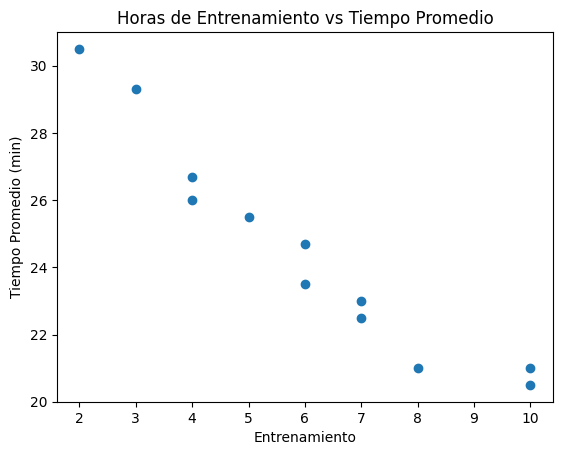

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
X = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]) # horas de entrenamiento semanal
Y = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]) # tiempo promedio del recorrido

# Calculo del coeficiente de correlación
correlacion = np.corrcoef(X, Y)[0, 1]
print(f'\nCorrelación entre Entrenamiento y Tiempo: {correlacion}\n')

# Diagrama de dispersión
plt.scatter(X, Y)
plt.xlabel('Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')
plt.title('Horas de Entrenamiento vs Tiempo Promedio')
plt.show()

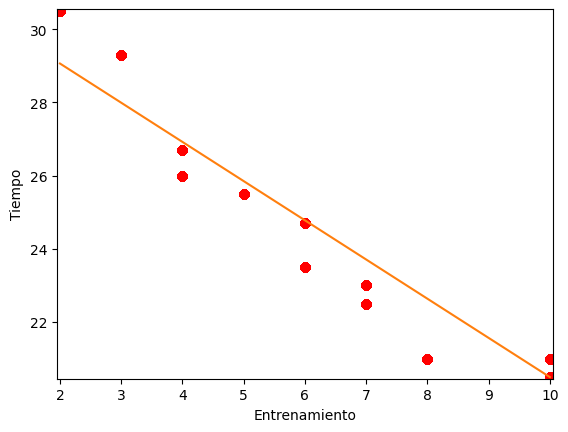

Pesos de la Neurona:
  w = -1.0711232782296471
  b = 31.206002961632457
Epocas:  442


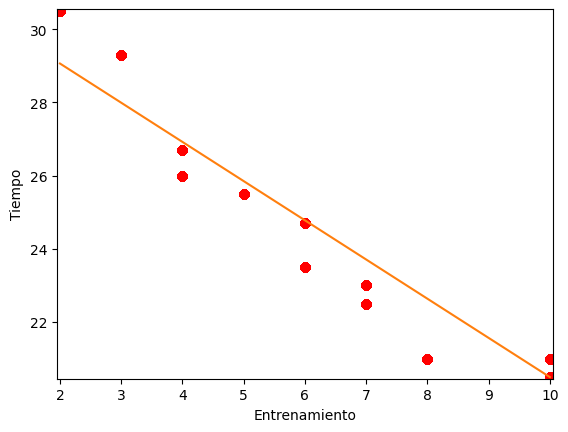

In [3]:
from ClassNeuronaLineal import NeuronaLineal

x_train = X.reshape(-1,1)    # selecciona entradas y formatea a Nx1
y_train = Y.reshape(-1,1)    # selecciona salidas y formatea a Nx1
print(x_train.shape)

# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.001, draw=1, title=['Entrenamiento', 'Tiempo'])
modelo = modelo.fit(x_train, y_train)

# imprime pesos
print('Pesos de la Neurona:')
print('  w =', modelo.w_[0])
print('  b =', modelo.b_[0])

print('Epocas: ', len(modelo.errors_))


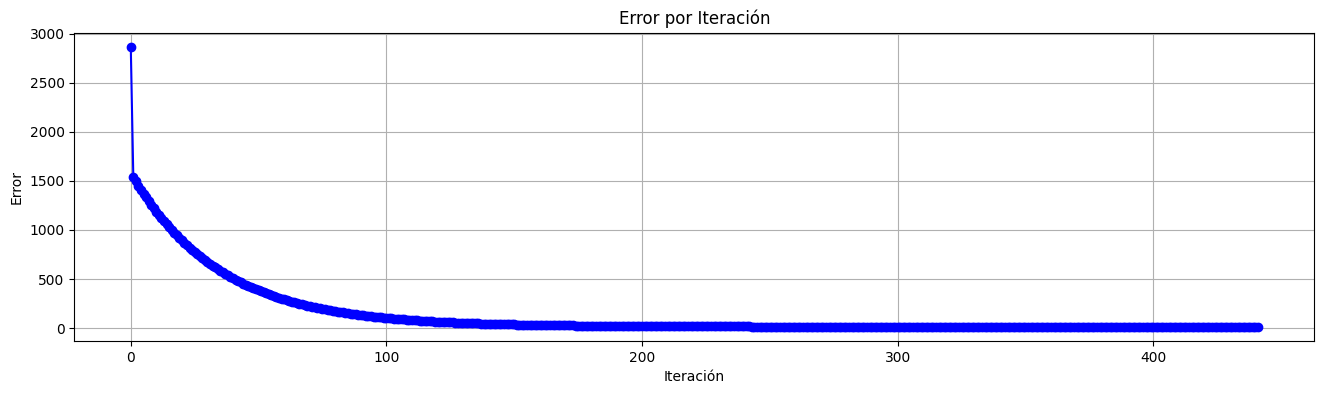

In [4]:

# grafica errores
plt.figure(figsize=(16,4))
plt.plot(range(len(modelo.errors_)), [err[0] for err in modelo.errors_], marker='o', linestyle='-', color='b')
plt.title('Error por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.show()

### Predicción del tiempo para caso particular de horas entrenadas

Quien dedicó 9 horas de entrenamiento tradará 21 minutos en hacer el recorrido



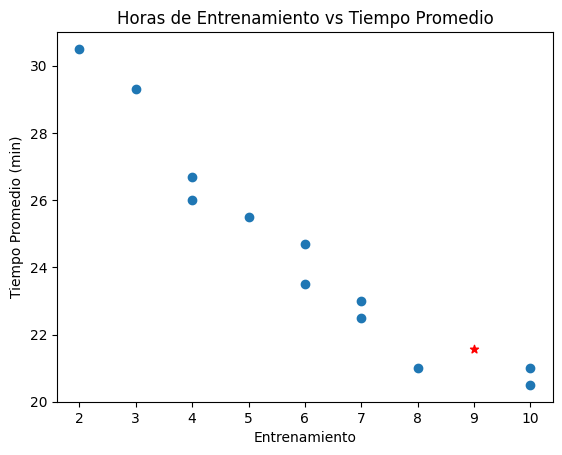

In [5]:
horas = 9 # horas semanales dedicadas
tiempo = modelo.predict([horas]) # prediccion del tiempo de recorrido en minutos

print('Quien dedicó %d horas de entrenamiento tradará %d minutos en hacer el recorrido\n' % (horas, tiempo[0]))

# Diagrama de dispersión
plt.scatter(X, Y)
plt.xlabel('Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')
plt.title('Horas de Entrenamiento vs Tiempo Promedio')

plt.scatter([horas], tiempo, marker='*', color='r', label='Predicción')

plt.show()


### Uso de modelo asignando pesos
Esto es útil cuando tenemos los pesos de un modelo ya entrenado. Se pueden usar de forma directa.

In [6]:
modelo.w_ = [-1.05]
modelo.b_ = [31.21]

horas = 9 # horas semanales dedicadas
tiempo = modelo.predict([horas]) # prediccion del tiempo de recorrido en minutos

print(f'Para {horas} horas de entrenamiento tardará {tiempo[0]:4.2f} minutos en hacer el recorrido')

Para 9 horas de entrenamiento tardará 21.76 minutos en hacer el recorrido
